In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# mlxtend is a library of useful tools for DM/ML tasks.
!pip install mlxtend
#from mlxtend.frequent_patterns import apriori, fpgrowth
#from mlxtend.frequent_patterns import association_rules


# 1. Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset_raw = pd.read_excel('/content/drive/MyDrive/content/Online Retail.xlsx')

In [ ]:

print (dataset_raw.isna().sum(axis=0))

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
dataset = dataset_raw.dropna()

In [ ]:
dataset.shape

(406829, 8)

# data analysis

In [ ]:
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
len(dataset['InvoiceNo'].unique())

22190

In [ ]:
#Total Amount = Unit Price * Quantity
dataset['TotalAmount'] = dataset['UnitPrice'] * dataset['Quantity']
print(dataset.shape)

(406829, 9)


<ipython-input-10-45ec35e8ce10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TotalAmount'] = dataset['UnitPrice'] * dataset['Quantity']


In [ ]:
gp_country = dataset.groupby('Country')
gp_country['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

In [ ]:
gp_country = dataset.groupby('Description')
gp_country['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
                                        ...    
WHITE CHERRY LIGHTS                      -54.00
CHALKBOARD KITCHEN ORGANISER             -87.80
Discount                               -5696.22
CRUK Commission                        -7933.43
Manual                                -58385.46
Name: TotalAmount, Length: 3896, dtype: float64

In [ ]:
gp_country = dataset.groupby('Country')
gp_country['Quantity'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


In [ ]:
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Malta                      10
Singapore                  10
Unspecified                 8
Iceland                     7
USA                         7
Israel                      6
Greece                      6
Canada                      6
Czech Republic              5
European Community          5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Ba

In [ ]:
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

# UK example

In [ ]:
uk_customers_amounts = dataset[dataset['Country']=='United Kingdom'].groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_customers_amounts.head(20)

CustomerID
18102.0    256438.49
17450.0    187482.17
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
13089.0     57385.88
14096.0     57120.91
15061.0     54228.74
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     50862.44
14088.0     50415.49
17841.0     40340.78
13798.0     36351.42
16422.0     33805.69
12931.0     33462.81
16013.0     33366.25
15838.0     33350.76
Name: TotalAmount, dtype: float64

In [ ]:
# United Kingdom frequently sold items by quantitiy
uk_gp_description = dataset[dataset['Country']=='United Kingdom'].groupby('Description')
uk_gp_description_frq_quantitiy = uk_gp_description['Quantity'].agg(np.sum).sort_values(ascending=False)
uk_gp_description_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      47982
JUMBO BAG RED RETROSPOT                40880
ASSORTED COLOUR BIRD ORNAMENT          32679
WHITE HANGING HEART T-LIGHT HOLDER     32097
POPCORN HOLDER                         28562
PACK OF 12 LONDON TISSUES              24313
BROCADE RING PURSE                     22708
PACK OF 72 RETROSPOT CAKE CASES        22205
VICTORIAN GLASS HANGING T-LIGHT        21456
PACK OF 60 PINK PAISLEY CAKE CASES     19916
ASSORTED COLOURS SILK FAN              18372
JUMBO BAG PINK POLKADOT                17636
RED  HARMONICA IN BOX                  16874
SMALL POPCORN HOLDER                   16655
HEART OF WICKER SMALL                  16226
JUMBO BAG STRAWBERRY                   15551
COLOUR GLASS T-LIGHT HOLDER HANGING    14722
GROW A FLYTRAP OR SUNFLOWER IN TIN     14620
PAPER CHAIN KIT 50'S CHRISTMAS         14459
PARTY BUNTING                          13728
Name: Quantity, dtype: int64

In [ ]:
# Frequently sold items by total amount
uk_gp_description_frq_amount = uk_gp_description['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_gp_description_frq_amount.head(20)

Description
REGENCY CAKESTAND 3 TIER              103122.85
WHITE HANGING HEART T-LIGHT HOLDER     88313.95
JUMBO BAG RED RETROSPOT                75416.67
PARTY BUNTING                          61952.58
ASSORTED COLOUR BIRD ORNAMENT          52314.87
CHILLI LIGHTS                          45155.61
PICNIC BASKET WICKER 60 PIECES         39619.50
PAPER CHAIN KIT 50'S CHRISTMAS         39596.73
BLACK RECORD COVER FRAME               37799.42
WOOD BLACK BOARD ANT WHITE FINISH      33408.76
DOORMAT KEEP CALM AND COME IN          33284.05
JUMBO BAG PINK POLKADOT                32608.17
SPOTTY BUNTING                         29685.54
JUMBO BAG STRAWBERRY                   28375.49
HEART OF WICKER LARGE                  28139.70
VICTORIAN GLASS HANGING T-LIGHT        27391.46
HEART OF WICKER SMALL                  27353.59
SET OF 3 CAKE TINS PANTRY DESIGN       24630.20
JAM MAKING SET WITH JARS               24027.97
PAPER CHAIN KIT VINTAGE CHRISTMAS      23298.92
Name: TotalAmount, dtype: fl

# one-hot

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

uk_dataset = dataset[dataset['Country']=='United Kingdom']
gp_invoiceno = uk_dataset.groupby('InvoiceNo')
transactions = []
for name,group in gp_invoiceno:
    transactions.append(list(group['Description'].map(str)))

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame (te_ary, columns=te.columns_)
display(df)
df.shape


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(19857, 3860)

# frequent set

In [ ]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

# Algorytm apriori
#frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
#frequent_itemsets

# Algorytm fpgrowh
frequent_itemsets = fpgrowth(df, min_support=0.07, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.096893,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.074885,(JUMBO BAG RED RETROSPOT)
2,0.078411,(REGENCY CAKESTAND 3 TIER)


association_rules

In [ ]:
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print( gp_country.ngroups)

In [ ]:
notran_country=gp_country["InvoiceNo"].unique().agg(np.size)
df_toshow=notran_country.to_frame()
df_toshow["percent"]=df_toshow['InvoiceNo']/df_toshow['InvoiceNo'].sum()*100
df_toshow.sort_values('InvoiceNo',ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,percent
Country,,
United Kingdom,19857,89.486255
Germany,603,2.717440
France,458,2.063993
EIRE,319,1.437584
Belgium,119,0.536278
Spain,105,0.473186
Netherlands,101,0.455160
Switzerland,71,0.319964
Portugal,70,0.315457


In [ ]:
print(,len(dataset['Description'].unique()))

In [ ]:
gp_stock=dataset.groupby("StockCode")
gp_stock['Quantity'].agg(np.size).sort_values(ascending=False).to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity
StockCode,
85123A,2077
22423,1905
85099B,1662
84879,1418
47566,1416
...,...
90011A,1
90131,1
90135,1


In [ ]:
gp_d=dataset.groupby("Description")
gp_d['Quantity'].agg(np.size).sort_values(ascending=False).to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416
...,...
BLUE NEW BAROQUE FLOCK CANDLESTICK,1
IVORY SHELL HEART EARRINGS,1
BLUE PAINTED KASHMIRI CHAIR,1


#

# Sales analysis in Polish clients segment
1. 10 best selling products
1. 10 best two-element products combinations.
2. 10 best three-element products combinations.
3. 10 best associations rules (*confidence* i *lift*)


In [ ]:
pl_gp_description = dataset[dataset['Country']=='Poland'].groupby('Description')
pl_gp_description_frq_quantitiy = pl_gp_description['Quantity'].agg(np.sum).sort_values(ascending=False)
pl_gp_description_frq_quantitiy.head(10)
#by quant

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description
STRAWBERRY CERAMIC TRINKET BOX        144
CERAMIC CAKE DESIGN SPOTTED MUG       138
JAM MAKING SET PRINTED                108
LARGE CHINESE STYLE SCISSOR           100
CERAMIC STRAWBERRY DESIGN MUG          96
SMALL CHINESE STYLE SCISSOR            80
PANTRY WASHING UP BRUSH                60
SET OF 4 PANTRY JELLY MOULDS           58
RECIPE BOX PANTRY YELLOW DESIGN        55
FOLKART STAR CHRISTMAS DECORATIONS     48
Name: Quantity, dtype: int64

In [ ]:
pl_dataset = dataset[dataset['Country']=='Poland']
gp_invoiceno_pl = pl_dataset.groupby('InvoiceNo')
transactions_pl = []
for name,group in gp_invoiceno_pl:
    transactions_pl.append(list(group['Description'].map(str)))

te = TransactionEncoder()
te_ary = te.fit(transactions_pl).transform(transactions_pl)
df_pl = pd.DataFrame (te_ary, columns=te.columns_)
display(df_pl)
df_pl.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,15CM CHRISTMAS GLASS BALL 20 LIGHTS,20 DOLLY PEGS RETROSPOT,3 HOOK PHOTO SHELF ANTIQUE WHITE,4 TRADITIONAL SPINNING TOPS,6 RIBBONS RUSTIC CHARM,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BATHROOM METAL SIGN,...,WHITE HAND TOWEL WITH BUTTERFLY,WHITE WOOD GARDEN PLANT LADDER,WOOD BLACK BOARD ANT WHITE FINISH,WRAP DOILEY DESIGN,WRAP I LOVE LONDON,WRAP SUKI AND FRIENDS,ZINC FOLKART SLEIGH BELLS,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(24, 205)

In [ ]:
frequent_itemsets_pl = fpgrowth(df_pl, min_support=0.1, use_colnames=True)
frequent_itemsets_pl = frequent_itemsets_pl.sort_values(['support'], ascending =[False])
frequent_itemsets_pl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
27,0.291667,(LARGE CHINESE STYLE SCISSOR)
5,0.291667,(RECIPE BOX PANTRY YELLOW DESIGN)
6,0.250000,(SET OF 6 SPICE TINS PANTRY DESIGN)
0,0.208333,(STRAWBERRY CERAMIC TRINKET BOX)
8,0.208333,(IVORY KITCHEN SCALES)
...,...,...
43,0.125000,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE CAKE..."
42,0.125000,"(LARGE CAKE STAND HANGING STRAWBERY, CERAMIC ..."
40,0.125000,"(STRAWBERRY CERAMIC TRINKET BOX, CERAMIC CAKE ..."
39,0.125000,(FRENCH PAISLEY CUSHION COVER)


In [ ]:
frequent_itemsets_pl['itemset_len'] = frequent_itemsets_pl['itemsets'].apply(lambda x: len(x))
frequent_itemsets_pl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
27,0.291667,(LARGE CHINESE STYLE SCISSOR),1
5,0.291667,(RECIPE BOX PANTRY YELLOW DESIGN),1
6,0.250000,(SET OF 6 SPICE TINS PANTRY DESIGN),1
0,0.208333,(STRAWBERRY CERAMIC TRINKET BOX),1
8,0.208333,(IVORY KITCHEN SCALES),1
...,...,...,...
43,0.125000,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE CAKE...",3
42,0.125000,"(LARGE CAKE STAND HANGING STRAWBERY, CERAMIC ...",2
40,0.125000,"(STRAWBERRY CERAMIC TRINKET BOX, CERAMIC CAKE ...",2
39,0.125000,(FRENCH PAISLEY CUSHION COVER),1


In [ ]:
frequent_itemsets_pl[(frequent_itemsets_pl['itemset_len'] == 1)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
27,0.291667,(LARGE CHINESE STYLE SCISSOR),1
5,0.291667,(RECIPE BOX PANTRY YELLOW DESIGN),1
6,0.250000,(SET OF 6 SPICE TINS PANTRY DESIGN),1
0,0.208333,(STRAWBERRY CERAMIC TRINKET BOX),1
8,0.208333,(IVORY KITCHEN SCALES),1
23,0.208333,(PANTRY WASHING UP BRUSH),1
20,0.208333,(LARGE CAKE STAND HANGING STRAWBERY),1
1,0.208333,(CERAMIC CAKE DESIGN SPOTTED MUG),1
32,0.208333,(POSTAGE),1
7,0.208333,(CERAMIC CAKE BOWL + HANGING CAKES),1


In [ ]:
frequent_itemsets_pl[(frequent_itemsets_pl['itemset_len'] == 2)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
85,0.166667,"(SMALL CHINESE STYLE SCISSOR, LARGE CHINESE ST...",2
41,0.166667,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC CA...",2
72,0.125000,"(CERAMIC STRAWBERRY DESIGN MUG, LARGE CAKE STA...",2
71,0.125000,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",2
68,0.125000,"(DOORMAT HOME SWEET HOME BLUE , LARGE CAKE STA...",2
70,0.125000,"(CERAMIC STRAWBERRY DESIGN MUG, CERAMIC CAKE D...",2
77,0.125000,"(PANTRY WASHING UP BRUSH, LARGE CAKE STAND HA...",2
67,0.125000,"(PANTRY WASHING UP BRUSH, DOORMAT HOME SWEET H...",2
66,0.125000,"(METAL 4 HOOK HANGER FRENCH CHATEAU, DOORMAT H...",2
65,0.125000,"(METAL 4 HOOK HANGER FRENCH CHATEAU, IVORY KIT...",2


In [ ]:
frequent_itemsets_pl[(frequent_itemsets_pl['itemset_len'] == 3)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
74,0.125,"(CERAMIC STRAWBERRY DESIGN MUG, LARGE CAKE STA...",3
75,0.125,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",3
73,0.125,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",3
69,0.125,"(PANTRY WASHING UP BRUSH, DOORMAT HOME SWEET H...",3
63,0.125,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",3
62,0.125,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",3
61,0.125,"(CERAMIC BOWL WITH STRAWBERRY DESIGN, CERAMIC ...",3
83,0.125,"(CERAMIC CAKE STAND + HANGING CAKES, PANTRY WA...",3
92,0.125,"(JAM MAKING SET WITH JARS, LARGE CHINESE STYLE...",3
82,0.125,"(CERAMIC CAKE STAND + HANGING CAKES, DOORMAT H...",3


In [ ]:
rules = association_rules(frequent_itemsets_pl, metric="confidence", min_threshold=0.5)
rules.sort_values(['confidence'], ascending =[False]).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SMALL CHINESE STYLE SCISSOR),(LARGE CHINESE STYLE SCISSOR),0.166667,0.291667,0.166667,1.0,3.428571,0.118056,inf,0.850000
128,"(PANTRY WASHING UP BRUSH, LARGE CAKE STAND HA...","(CERAMIC CAKE STAND + HANGING CAKES, DOORMAT H...",0.125000,0.125000,0.125000,1.0,8.000000,0.109375,inf,1.000000
106,"(JAM MAKING SET WITH JARS, POSTAGE)",(LARGE CHINESE STYLE SCISSOR),0.125000,0.291667,0.125000,1.0,3.428571,0.088542,inf,0.809524
107,"(LARGE CHINESE STYLE SCISSOR, POSTAGE)",(JAM MAKING SET WITH JARS),0.125000,0.125000,0.125000,1.0,8.000000,0.109375,inf,1.000000
108,(JAM MAKING SET WITH JARS),"(LARGE CHINESE STYLE SCISSOR, POSTAGE)",0.125000,0.125000,0.125000,1.0,8.000000,0.109375,inf,1.000000
110,(JAM MAKING SET WITH JARS),(LARGE CHINESE STYLE SCISSOR),0.125000,0.291667,0.125000,1.0,3.428571,0.088542,inf,0.809524
111,(JAM MAKING SET WITH JARS),(POSTAGE),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762
114,(CERAMIC CAKE STAND + HANGING CAKES),(PANTRY WASHING UP BRUSH),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762
116,(JUMBO BAG PINK VINTAGE PAISLEY),(LARGE CAKE STAND HANGING STRAWBERY),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762
119,(MINT KITCHEN SCALES),(IVORY KITCHEN SCALES),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762


In [ ]:
rules = association_rules(frequent_itemsets_pl, metric="lift", min_threshold=1.5)
rules.sort_values(['lift'], ascending =[False]).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
56,(CERAMIC STRAWBERRY CAKE MONEY BANK),"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
45,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",(CERAMIC STRAWBERRY CAKE MONEY BANK),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
69,(CERAMIC STRAWBERRY CAKE MONEY BANK),"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
68,(LARGE HEART MEASURING SPOONS),"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
136,(CERAMIC CAKE STAND + HANGING CAKES),"(PANTRY WASHING UP BRUSH, DOORMAT HOME SWEET H...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
65,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",(LARGE HEART MEASURING SPOONS),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
64,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",(CERAMIC STRAWBERRY CAKE MONEY BANK),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
63,(CERAMIC BOWL WITH STRAWBERRY DESIGN),"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
62,(LARGE HEART MEASURING SPOONS),"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC BO...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
59,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC BO...",(LARGE HEART MEASURING SPOONS),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0


# Zadanie 2b. Visualization


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'support')

<Figure size 5000x1000 with 0 Axes>

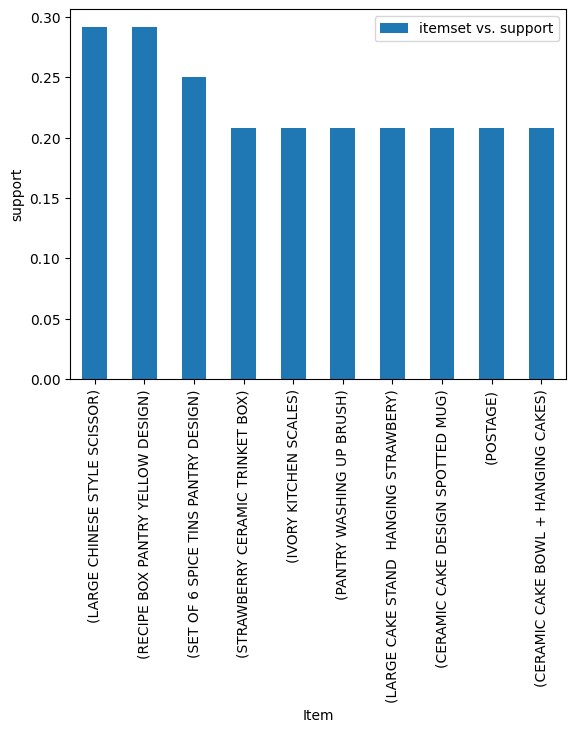

In [ ]:
plt.figure(figsize=(50,10))

frequent_itemsets_pl.head(10).plot( x = 'itemsets', y = 'support', kind ='bar', label = 'itemset vs. support')
plt.xlabel('Item')
plt.ylabel('support')

# Zadanie 3a: Sales analysis in french clients segment


In [ ]:
fr_gp_description = dataset[dataset['Country']=='France'].groupby('Description')
fr_gp_description_frq_quantitiy = fr_gp_description['Quantity'].agg(np.sum).sort_values(ascending=False)
fr_gp_description_frq_quantitiy.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description
RABBIT NIGHT LIGHT                  3999
MINI PAINT SET VINTAGE              2196
RED TOADSTOOL LED NIGHT LIGHT       1290
SET/6 RED SPOTTY PAPER CUPS         1272
ASSORTED COLOUR BIRD ORNAMENT       1204
PACK OF 72 RETROSPOT CAKE CASES     1176
PLASTERS IN TIN WOODLAND ANIMALS    1144
PLASTERS IN TIN CIRCUS PARADE       1127
SET/6 RED SPOTTY PAPER PLATES       1116
PLASTERS IN TIN SPACEBOY            1011
Name: Quantity, dtype: int64

In [ ]:
fr_dataset = dataset[dataset['Country']=='France']
gp_invoiceno_fr = fr_dataset.groupby('InvoiceNo')
transactions_fr = []
for name,group in gp_invoiceno_fr:
    transactions_fr.append(list(group['Description'].map(str)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions_fr).transform(transactions_fr)
df_fr = pd.DataFrame (te_ary, columns=te.columns_)
display(df_fr)
df_fr.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(458, 1545)

In [ ]:
frequent_itemsets_fr = fpgrowth(df_fr, min_support=0.1, use_colnames=True)
frequent_itemsets_fr = frequent_itemsets_fr.sort_values(['support'], ascending =[False])
frequent_itemsets_fr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.679039,(POSTAGE)
18,0.161572,(RABBIT NIGHT LIGHT)
1,0.155022,(RED TOADSTOOL LED NIGHT LIGHT)
15,0.148472,(PLASTERS IN TIN CIRCUS PARADE )
8,0.146288,(PLASTERS IN TIN WOODLAND ANIMALS)
26,0.141921,"(RABBIT NIGHT LIGHT, POSTAGE)"
2,0.139738,(ROUND SNACK BOXES SET OF4 WOODLAND )
19,0.135371,"(RED TOADSTOOL LED NIGHT LIGHT, POSTAGE)"
4,0.133188,(LUNCH BAG RED RETROSPOT)
25,0.126638,"(PLASTERS IN TIN CIRCUS PARADE , POSTAGE)"


In [ ]:
frequent_itemsets_fr['itemset_len'] = frequent_itemsets_fr['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
0,0.679039,(POSTAGE),1
18,0.161572,(RABBIT NIGHT LIGHT),1
1,0.155022,(RED TOADSTOOL LED NIGHT LIGHT),1
15,0.148472,(PLASTERS IN TIN CIRCUS PARADE ),1
8,0.146288,(PLASTERS IN TIN WOODLAND ANIMALS),1
26,0.141921,"(RABBIT NIGHT LIGHT, POSTAGE)",2
2,0.139738,(ROUND SNACK BOXES SET OF4 WOODLAND ),1
19,0.135371,"(RED TOADSTOOL LED NIGHT LIGHT, POSTAGE)",2
4,0.133188,(LUNCH BAG RED RETROSPOT),1
25,0.126638,"(PLASTERS IN TIN CIRCUS PARADE , POSTAGE)",2


In [ ]:

frequent_itemsets_fr[(frequent_itemsets_fr['itemset_len'] == 1)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
0,0.679039,(POSTAGE),1
18,0.161572,(RABBIT NIGHT LIGHT),1
1,0.155022,(RED TOADSTOOL LED NIGHT LIGHT),1
15,0.148472,(PLASTERS IN TIN CIRCUS PARADE ),1
8,0.146288,(PLASTERS IN TIN WOODLAND ANIMALS),1
2,0.139738,(ROUND SNACK BOXES SET OF4 WOODLAND ),1
4,0.133188,(LUNCH BAG RED RETROSPOT),1
5,0.124454,(LUNCH BOX WITH CUTLERY RETROSPOT ),1
6,0.120087,(RED RETROSPOT MINI CASES),1
13,0.117904,(SET/6 RED SPOTTY PAPER CUPS),1


In [ ]:
frequent_itemsets_fr[(frequent_itemsets_fr['itemset_len'] == 2)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len
26,0.141921,"(RABBIT NIGHT LIGHT, POSTAGE)",2
19,0.135371,"(RED TOADSTOOL LED NIGHT LIGHT, POSTAGE)",2
25,0.126638,"(PLASTERS IN TIN CIRCUS PARADE , POSTAGE)",2
20,0.126638,"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",2
22,0.117904,"(PLASTERS IN TIN WOODLAND ANIMALS, POSTAGE)",2
21,0.104803,"(POSTAGE, LUNCH BAG RED RETROSPOT)",2
24,0.104803,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",2
23,0.100437,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",2


In [ ]:

frequent_itemsets_fr[(frequent_itemsets_fr['itemset_len'] == 3)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,itemset_len


In [ ]:
rules = association_rules(frequent_itemsets_fr, metric="confidence", min_threshold=0.5)
rules.sort_values(['confidence'], ascending =[False]).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.109170,0.117904,0.104803,0.960000,8.142222,0.091932,22.052402,0.984681
3,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.139738,0.679039,0.126638,0.906250,1.334606,0.031750,3.423581,0.291441
7,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117904,0.109170,0.104803,0.888889,8.142222,0.091932,8.017467,0.994431
0,(RABBIT NIGHT LIGHT),(POSTAGE),0.161572,0.679039,0.141921,0.878378,1.293560,0.032208,2.639010,0.270673
1,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.155022,0.679039,0.135371,0.873239,1.285992,0.030105,2.532023,0.263191
2,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.148472,0.679039,0.126638,0.852941,1.256100,0.025819,2.182533,0.239434
8,(SET/6 RED SPOTTY PAPER CUPS),(POSTAGE),0.117904,0.679039,0.100437,0.851852,1.254496,0.020375,2.166485,0.229983
4,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.146288,0.679039,0.117904,0.805970,1.186927,0.018568,1.654182,0.184475
5,(LUNCH BAG RED RETROSPOT),(POSTAGE),0.133188,0.679039,0.104803,0.786885,1.158821,0.014364,1.506046,0.158113


In [ ]:
rules = association_rules(frequent_itemsets_fr, metric="lift", min_threshold=1.5)
rules.sort_values(['lift'], ascending =[False]).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.109170,0.117904,0.104803,0.960000,8.142222,0.091932,22.052402,0.984681
1,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117904,0.109170,0.104803,0.888889,8.142222,0.091932,8.017467,0.994431


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'support')

<Figure size 5000x1000 with 0 Axes>

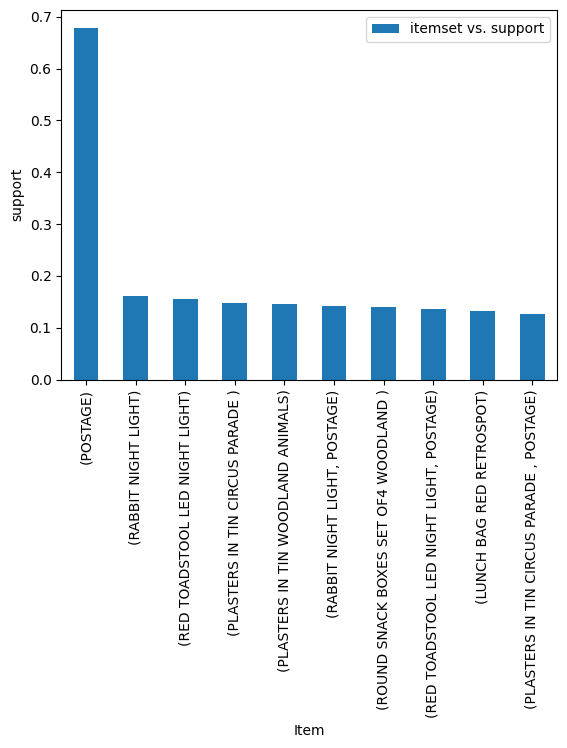

In [ ]:
plt.figure(figsize=(50,10))

frequent_itemsets_fr.head(10).plot( x = 'itemsets', y = 'support', kind ='bar', label = 'itemset vs. support')
plt.xlabel('Item')
plt.ylabel('support')

# Zadanie 4:  chart *min-sup* vs. *number of frequent sets*


In [ ]:
gp_dataset = dataset.groupby('InvoiceNo')
transactions = []
for name,group in gp_dataset:
    transactions.append(list(group['Description'].map(str)))

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame (te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = fpgrowth(df, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
supp_ap=[0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
n_freq = []
for i in supp_ap:
  fi = fpgrowth(df, min_support=i, use_colnames=True)
  n_freq.append(len(fi))
print(n_freq)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0, 1, 2, 3, 5, 8, 21, 59, 176, 739]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

Text(0, 0.5, 'quant of frequent items')

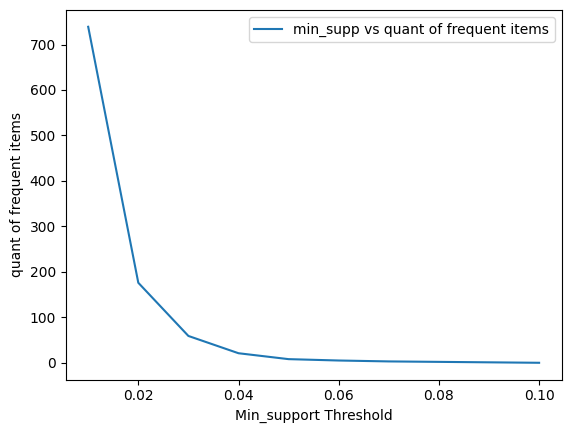

In [ ]:
import seaborn as sns
sns.lineplot(x=supp_ap,y=n_freq,label="min_supp vs quant of frequent items")
plt.xlabel("Min_support Threshold")
plt.ylabel("quant of frequent items")

# FPGrowth vs Apriori
*min-sup*

In [ ]:
import time
l_ap=[0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.015]
t_ap=[]
for i in l_ap:
    t1=time.time()
    apriori(df,min_support=i,use_colnames=True)
    t2=time.time()
    t_ap.append((t2-t1)*1000)

l_fp=[0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
t_fp=[]
for i in l_fp:
    t1=time.time()
    fpgrowth(df,min_support=i,use_colnames=True)
    t2=time.time()
    t_fp.append((t2-t1)*1000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

Text(0, 0.5, 'Run Time in ms')

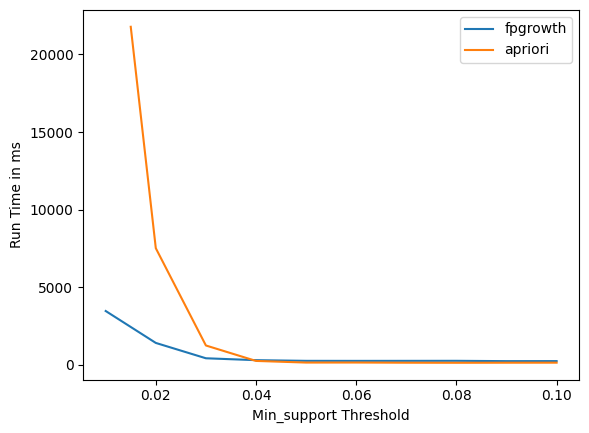

In [ ]:
sns.lineplot(x=l_fp,y=t_fp,label="fpgrowth")
sns.lineplot(x=l_ap,y=t_ap,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

# summary


PL

In [ ]:
rules = association_rules(frequent_itemsets_pl, metric="confidence", min_threshold=0.1)
rules.sort_values(['confidence'], ascending =[False]).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SMALL CHINESE STYLE SCISSOR),(LARGE CHINESE STYLE SCISSOR),0.166667,0.291667,0.166667,1.0,3.428571,0.118056,inf,0.850000
134,"(PANTRY WASHING UP BRUSH, LARGE CAKE STAND HA...","(CERAMIC CAKE STAND + HANGING CAKES, DOORMAT H...",0.125000,0.125000,0.125000,1.0,8.000000,0.109375,inf,1.000000
109,"(JAM MAKING SET WITH JARS, POSTAGE)",(LARGE CHINESE STYLE SCISSOR),0.125000,0.291667,0.125000,1.0,3.428571,0.088542,inf,0.809524
110,"(LARGE CHINESE STYLE SCISSOR, POSTAGE)",(JAM MAKING SET WITH JARS),0.125000,0.125000,0.125000,1.0,8.000000,0.109375,inf,1.000000
111,(JAM MAKING SET WITH JARS),"(LARGE CHINESE STYLE SCISSOR, POSTAGE)",0.125000,0.125000,0.125000,1.0,8.000000,0.109375,inf,1.000000
114,(JAM MAKING SET WITH JARS),(LARGE CHINESE STYLE SCISSOR),0.125000,0.291667,0.125000,1.0,3.428571,0.088542,inf,0.809524
116,(JAM MAKING SET WITH JARS),(POSTAGE),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762
120,(CERAMIC CAKE STAND + HANGING CAKES),(PANTRY WASHING UP BRUSH),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762
122,(JUMBO BAG PINK VINTAGE PAISLEY),(LARGE CAKE STAND HANGING STRAWBERY),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762
125,(MINT KITCHEN SCALES),(IVORY KITCHEN SCALES),0.125000,0.208333,0.125000,1.0,4.800000,0.098958,inf,0.904762


In [ ]:
rules = association_rules(frequent_itemsets_pl, metric="lift", min_threshold=1.2)
rules.sort_values(['lift'], ascending =[False]).head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
56,(CERAMIC STRAWBERRY CAKE MONEY BANK),"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
45,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",(CERAMIC STRAWBERRY CAKE MONEY BANK),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
69,(CERAMIC STRAWBERRY CAKE MONEY BANK),"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
68,(LARGE HEART MEASURING SPOONS),"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
136,(CERAMIC CAKE STAND + HANGING CAKES),"(PANTRY WASHING UP BRUSH, DOORMAT HOME SWEET H...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
65,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC ST...",(LARGE HEART MEASURING SPOONS),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
64,"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",(CERAMIC STRAWBERRY CAKE MONEY BANK),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
63,(CERAMIC BOWL WITH STRAWBERRY DESIGN),"(CERAMIC CAKE BOWL + HANGING CAKES, LARGE HEAR...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
62,(LARGE HEART MEASURING SPOONS),"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC BO...",0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0
59,"(CERAMIC CAKE BOWL + HANGING CAKES, CERAMIC BO...",(LARGE HEART MEASURING SPOONS),0.125,0.125,0.125,1.0,8.0,0.109375,inf,1.0


FR

In [ ]:
rules = association_rules(frequent_itemsets_fr, metric="confidence", min_threshold=0.1)
rules.sort_values(['confidence'], ascending =[False]).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.109170,0.117904,0.104803,0.960000,8.142222,0.091932,22.052402,0.984681
6,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.139738,0.679039,0.126638,0.906250,1.334606,0.031750,3.423581,0.291441
13,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117904,0.109170,0.104803,0.888889,8.142222,0.091932,8.017467,0.994431
0,(RABBIT NIGHT LIGHT),(POSTAGE),0.161572,0.679039,0.141921,0.878378,1.293560,0.032208,2.639010,0.270673
2,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.155022,0.679039,0.135371,0.873239,1.285992,0.030105,2.532023,0.263191
4,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.148472,0.679039,0.126638,0.852941,1.256100,0.025819,2.182533,0.239434
14,(SET/6 RED SPOTTY PAPER CUPS),(POSTAGE),0.117904,0.679039,0.100437,0.851852,1.254496,0.020375,2.166485,0.229983
8,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.146288,0.679039,0.117904,0.805970,1.186927,0.018568,1.654182,0.184475
11,(LUNCH BAG RED RETROSPOT),(POSTAGE),0.133188,0.679039,0.104803,0.786885,1.158821,0.014364,1.506046,0.158113
1,(POSTAGE),(RABBIT NIGHT LIGHT),0.679039,0.161572,0.141921,0.209003,1.293560,0.032208,1.059964,0.707064


In [ ]:
rules = association_rules(frequent_itemsets_fr, metric="lift", min_threshold=1.2)
rules.sort_values(['lift'], ascending =[False]).head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.109170,0.117904,0.104803,0.960000,8.142222,0.091932,22.052402,0.984681
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117904,0.109170,0.104803,0.888889,8.142222,0.091932,8.017467,0.994431
6,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.139738,0.679039,0.126638,0.906250,1.334606,0.031750,3.423581,0.291441
7,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.679039,0.139738,0.126638,0.186495,1.334606,0.031750,1.057476,0.781140
0,(RABBIT NIGHT LIGHT),(POSTAGE),0.161572,0.679039,0.141921,0.878378,1.293560,0.032208,2.639010,0.270673
1,(POSTAGE),(RABBIT NIGHT LIGHT),0.679039,0.161572,0.141921,0.209003,1.293560,0.032208,1.059964,0.707064
3,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.679039,0.155022,0.135371,0.199357,1.285992,0.030105,1.055374,0.692890
2,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.155022,0.679039,0.135371,0.873239,1.285992,0.030105,2.532023,0.263191
5,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE ),0.679039,0.148472,0.126638,0.186495,1.256100,0.025819,1.046740,0.635233
4,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.148472,0.679039,0.126638,0.852941,1.256100,0.025819,2.182533,0.239434
